In [1]:
import omicverse as ov
import scanpy as sc
import matplotlib.pyplot as plt
ov.utils.ov_plot_set()


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.5.8, Tutorials: https://omicverse.readthedocs.io/


In [78]:
ov.__version__

'1.5.8'

In [113]:
# Download annotation databases
ov.utils.download_pathway_database()
ov.utils.download_geneid_annotation_pair()

......Pathway Geneset download start: GO_Biological_Process_2021
......Loading dataset from genesets/GO_Biological_Process_2021.txt
......Pathway Geneset download start: GO_Cellular_Component_2021
......Loading dataset from genesets/GO_Cellular_Component_2021.txt
......Pathway Geneset download start: GO_Molecular_Function_2021
......Loading dataset from genesets/GO_Molecular_Function_2021.txt
......Pathway Geneset download start: WikiPathway_2021_Human
......Loading dataset from genesets/WikiPathway_2021_Human.txt
......Pathway Geneset download start: WikiPathways_2019_Mouse
......Loading dataset from genesets/WikiPathways_2019_Mouse.txt
......Pathway Geneset download start: Reactome_2022
......Loading dataset from genesets/Reactome_2022.txt
......Pathway Geneset download finished!
......Other Genesets can be dowload in `https://maayanlab.cloud/Enrichr/#libraries`
......Geneid Annotation Pair download start: pair_GRCm39
......Loading dataset from genesets/pair_GRCm39.tsv
......Geneid A

In [43]:
# Load the integrated epicardium data
adata = sc.read('/mnt/sdb/qdang/singlecell/epi/run2_fullgene_human_mouse_epionly_integration_cleaned_ver2.h5ad')
adata

AnnData object with n_obs × n_vars = 5784 × 25011
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'replicates', 'scDblFinder_score', 'scDblFinder_class', 'batch', 'n_genes', 'size_factors', 'leiden_res0_25', 'celltypist_cell_label_PRJNA795900', 'celltypist_conf_score_PRJNA795900', '_scvi_batch', '_scvi_labels', 'leiden_res0_5', 'leiden_res1', 'cell type', 'cell type 2', 'time', 'region', 'Sample', 'percent.mt', 'EXPT', 'barcode', 'Batch', 'celltypist_cell_label_kundaje', 'celltypist_conf_score_kundaje', 'Species', 'cell_type'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'Species_colors', '_scvi_manager_uuid', '_scvi_uuid

In [ ]:
# Set the .X layer of the anndata object to normalised and log1p-transformed data
adata.X = adata.layers['log1p_norm'].copy()

In [20]:
# Compute the AUCell scores of all signaling pathways in the database and store the results as an anndata file
pathway_dict=ov.utils.geneset_prepare('genesets/GO_Biological_Process_2021.txt',organism='Human')

In [21]:
# Prepare the mouse GO 2021 gene set
pathway_dict=ov.utils.geneset_prepare('genesets/GO_Biological_Process_2021.txt',organism='Human')
##Compute the AUCell scores of all signaling pathways in the database and store the results as an anndata file
adata_aucs=ov.single.pathway_aucell_enrichment(adata,
                                                  pathways_dict=pathway_dict,
                                                  num_workers=30)

ctxcore have been install version: 0.2.0


Less than 80% of the genes in cell differentiation in spinal cord (GO:0021515) are present in the expression matrix.
Less than 80% of the genes in 3'-UTR-mediated mRNA stabilization (GO:0070935) are present in the expression matrix.
Less than 80% of the genes in acid secretion (GO:0046717) are present in the expression matrix.
Less than 80% of the genes in detection of bacterium (GO:0016045) are present in the expression matrix.
Less than 80% of the genes in enteroendocrine cell differentiation (GO:0035883) are present in the expression matrix.
Less than 80% of the genes in detection of chemical stimulus involved in sensory perception (GO:0050907) are present in the expression matrix.
Less than 80% of the genes in cell proliferation in forebrain (GO:0021846) are present in the expression matrix.
Less than 80% of the genes in genitalia development (GO:0048806) are present in the expression matrix.
Less than 80% of the genes in leukotriene D4 metabolic process (GO:1901748) are present in

In [22]:
# Store the resulting gene set pathway
adata_aucs.obs=adata[adata_aucs.obs.index].obs
adata_aucs.obsm=adata[adata_aucs.obs.index].obsm
adata_aucs.obsp=adata[adata_aucs.obs.index].obsp
adata_aucs

AnnData object with n_obs × n_vars = 5784 × 6036
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'replicates', 'scDblFinder_score', 'scDblFinder_class', 'batch', 'n_genes', 'size_factors', 'leiden_res0_25', 'celltypist_cell_label_PRJNA795900', 'celltypist_conf_score_PRJNA795900', '_scvi_batch', '_scvi_labels', 'leiden_res0_5', 'leiden_res1', 'cell type', 'cell type 2', 'time', 'region', 'Sample', 'percent.mt', 'EXPT', 'barcode', 'Batch', 'celltypist_cell_label_kundaje', 'celltypist_conf_score_kundaje', 'Species', 'cell_type'
    obsm: 'BBKNN', 'Harmony', 'LIGER', 'Scanorama', 'Unintegrated', 'X_pca', 'X_umap', 'scANVI', 'scGen', 'scVI'
    obsp: 'connectivities', 'distances'

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:10)
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden_res0_5']`


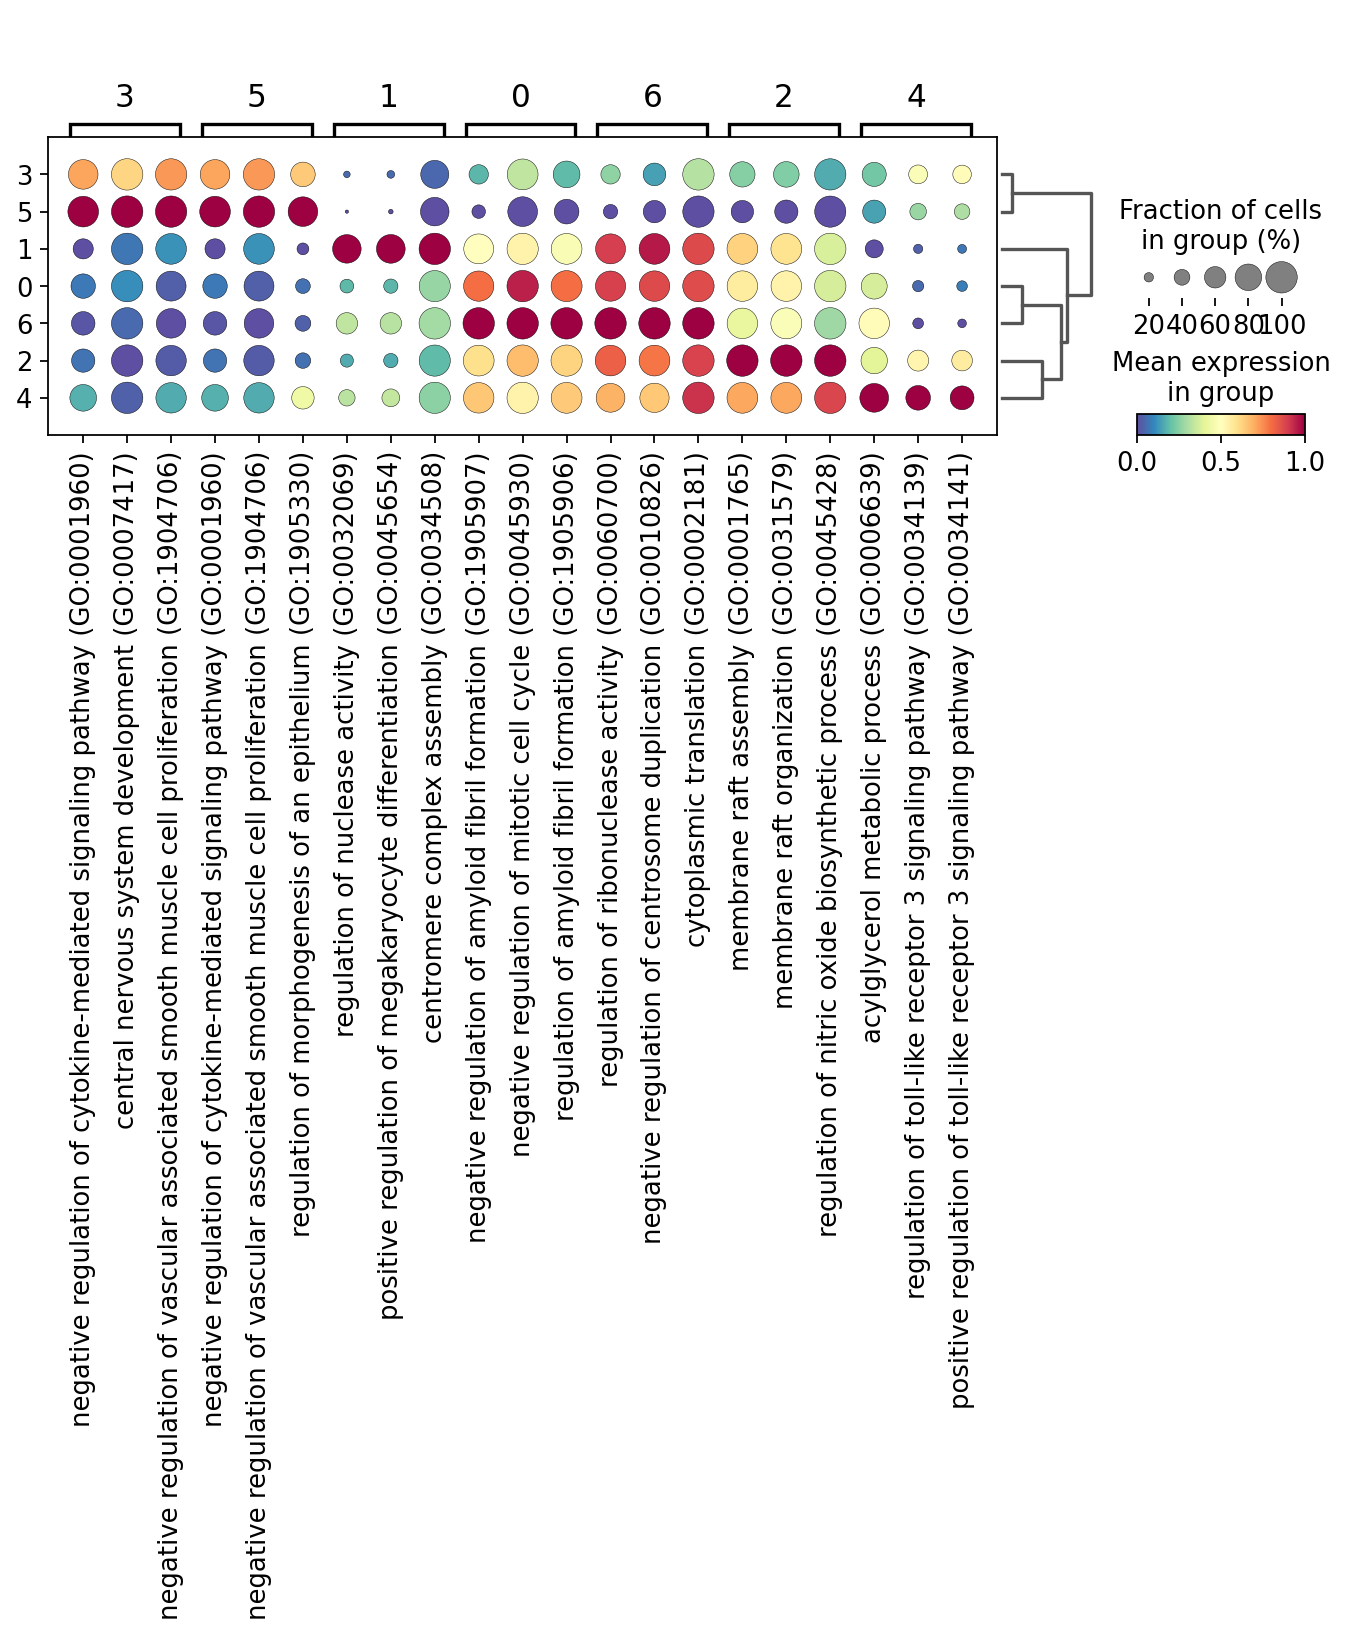

In [23]:
# Determine clusters-specific signaling pathways
sc.tl.rank_genes_groups(adata_aucs, 'leiden_res0_5', method='t-test',n_genes=100)
sc.pl.rank_genes_groups_dotplot(adata_aucs,groupby='leiden_res0_5',
                                cmap='Spectral_r',
                                standard_scale='var',n_genes=3)

In [27]:
# Extract specific signaling pathways that are unique to particular clusters. In this case, we are extracting pathways specific to the 'Migratory' population. 
# The Log2FC threshold and p-value cutoffs for enriched pathways are selected to be 2.5 and 0.05, respectively. 
degs = sc.get.rank_genes_groups_df(adata_aucs, group='5', key='rank_genes_groups', log2fc_min=2.5, 
                                    pval_cutoff=0.05)['names'].squeeze()
degs

0     negative regulation of chemokine-mediated sign...
1     negative regulation of vascular permeability (...
2     regulation of chemokine-mediated signaling pat...
3                  cAMP-mediated signaling (GO:0019933)
4                         response to cGMP (GO:0070305)
5                cellular response to cGMP (GO:0071321)
6     peripheral nervous system axon ensheathment (G...
7                 Schwann cell development (GO:0014044)
8             Schwann cell differentiation (GO:0014037)
9            presynaptic membrane assembly (GO:0097105)
10       presynaptic membrane organization (GO:0097090)
11    positive regulation of vascular permeability (...
Name: names, dtype: object

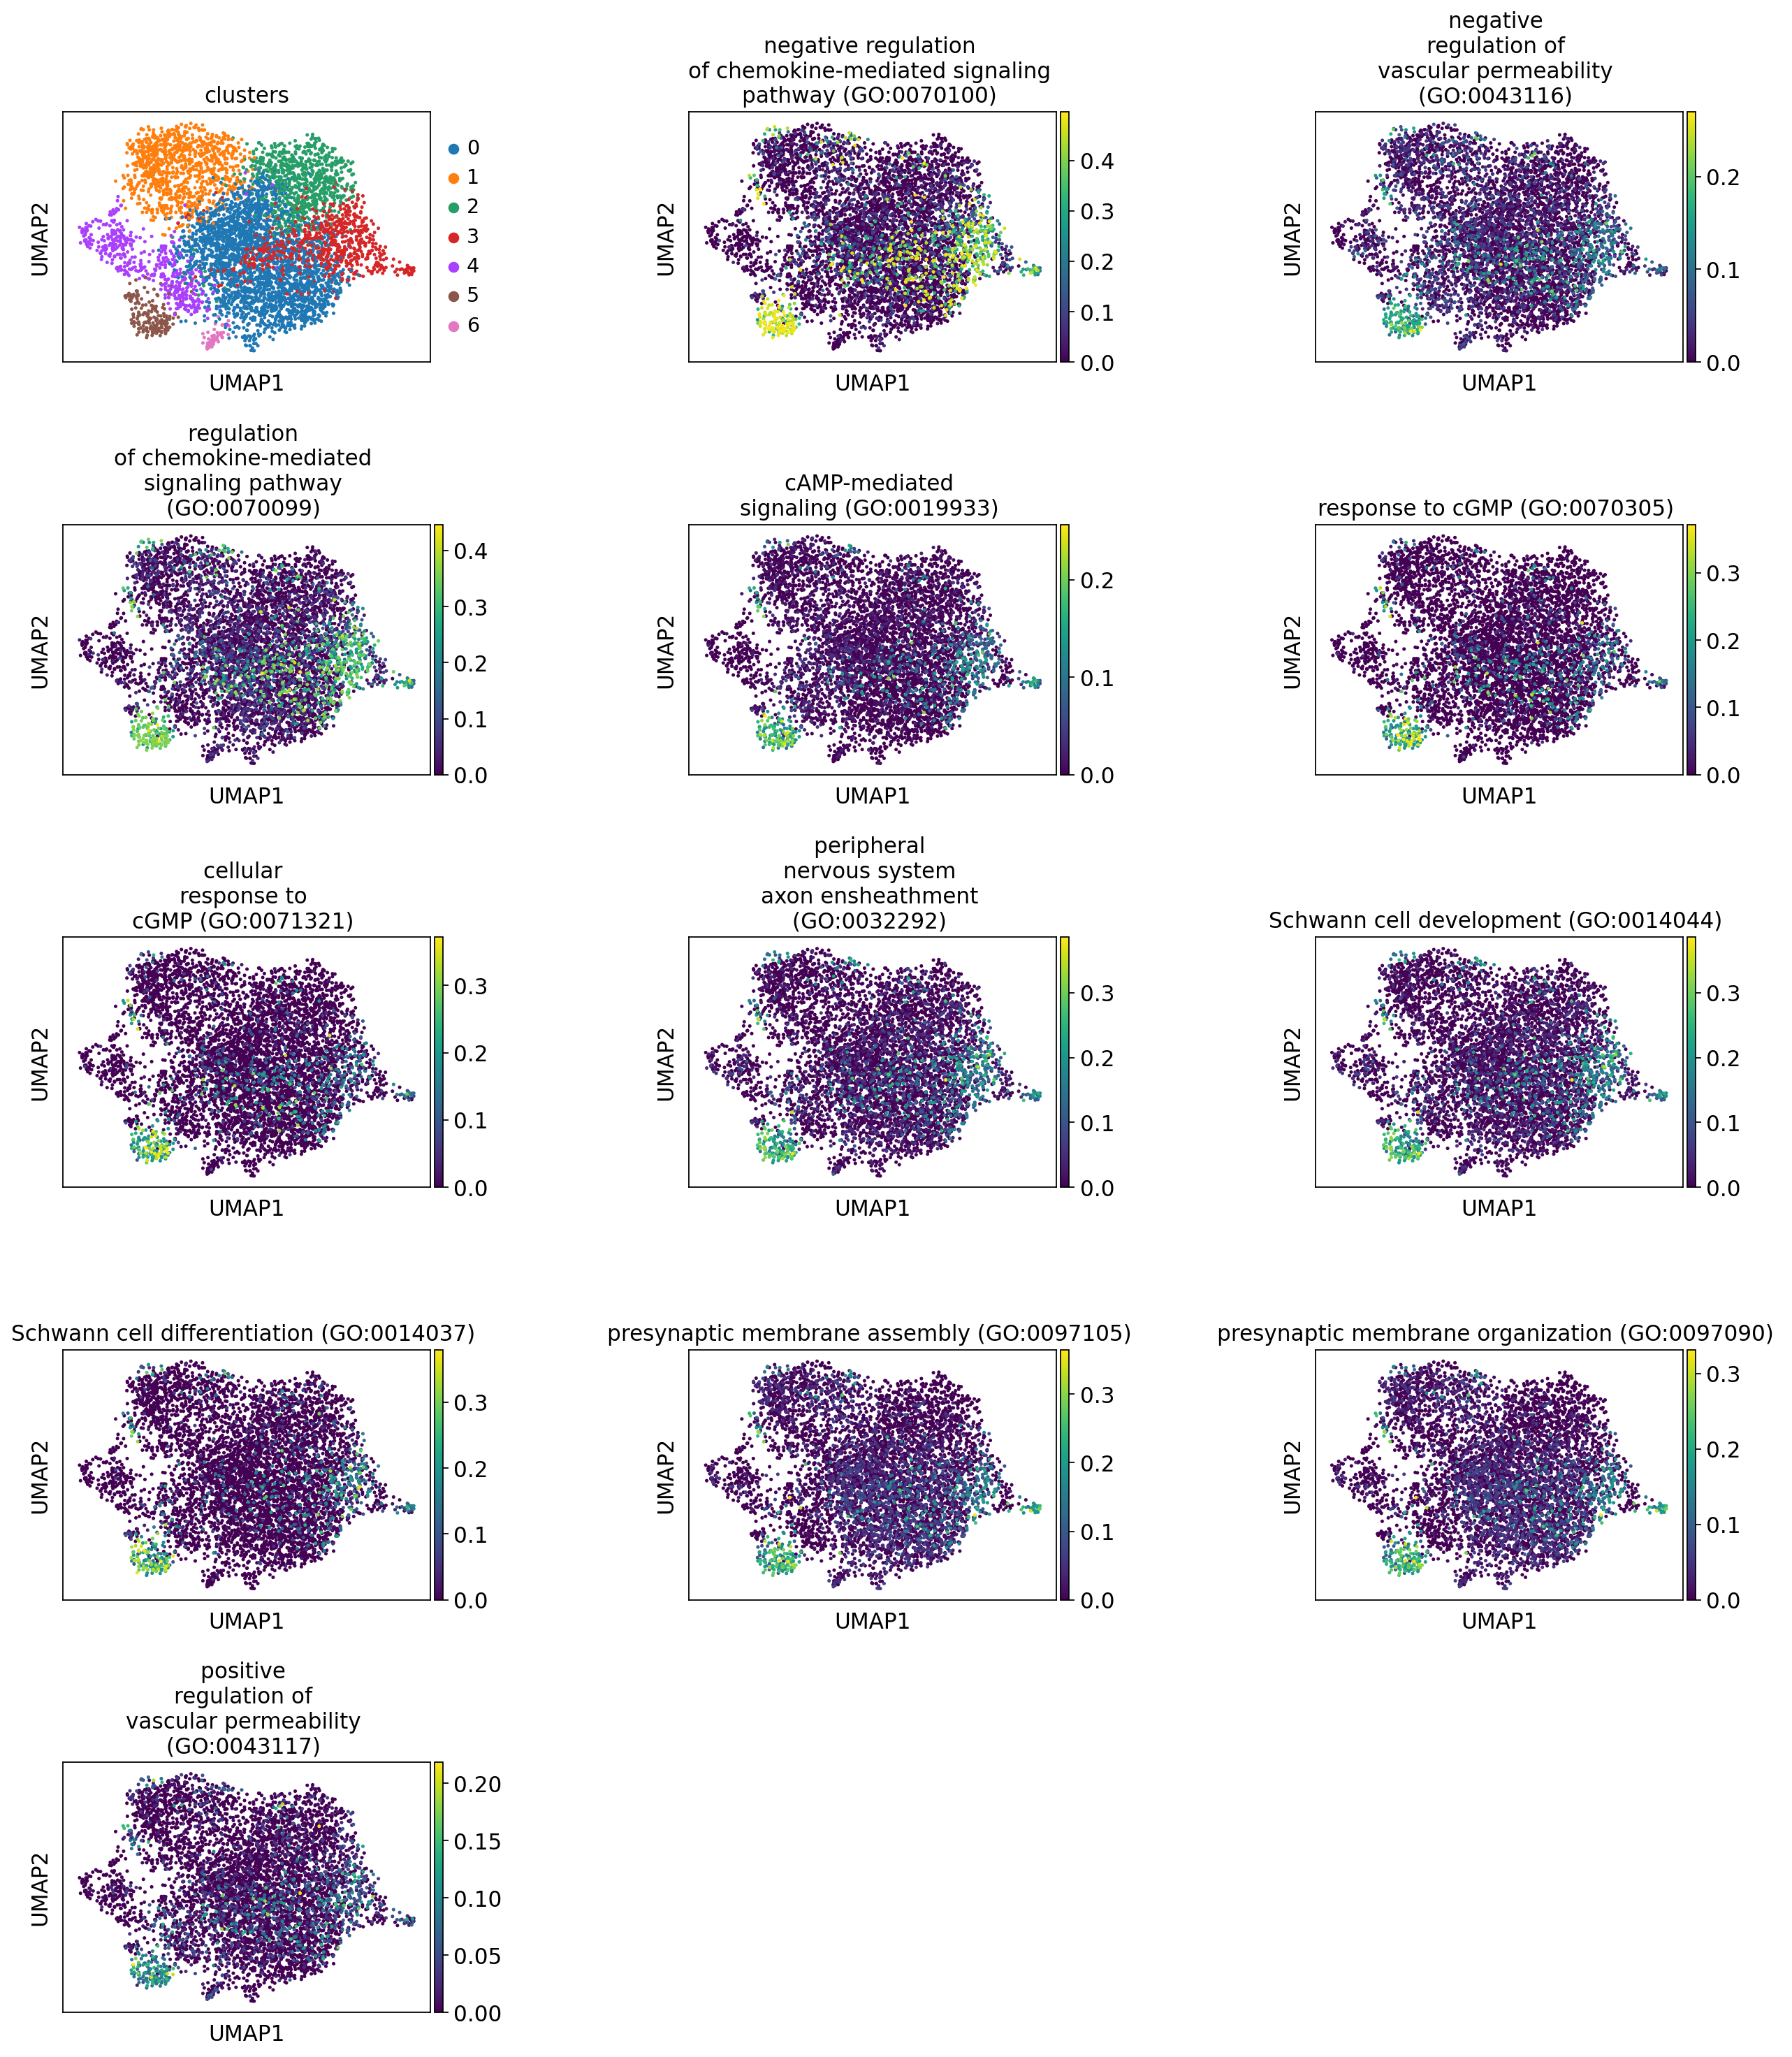

In [28]:
# Visualise pathways enriched to the Migratory population
axes=sc.pl.embedding(adata_aucs,ncols=3,
                basis='umap',show=False,return_fig=True,wspace=0.55,hspace=0.65,
                color=['leiden_res0_5']+degs.values.tolist(),
                title=[ov.utils.plot_text_set(i,3,20)for i in ['clusters']+degs.values.tolist()])

axes.tight_layout()

In [29]:
# Visualise the pathways enriched to another clusters
degs = sc.get.rank_genes_groups_df(adata_aucs, group='3', key='rank_genes_groups', log2fc_min=2.5, 
                                    pval_cutoff=0.05)['names'].squeeze()
degs

0           folate transmembrane transport (GO:0098838)
1            coronary artery morphogenesis (GO:0060982)
2             female genitalia development (GO:0030540)
3       positive regulation of gliogenesis (GO:0014015)
4     regulation of sequestering of calcium ion (GO:...
5     release of sequestered calcium ion into cytoso...
6     release of sequestered calcium ion into cytoso...
7       calcium ion transport into cytosol (GO:0060402)
8              striated muscle hypertrophy (GO:0014897)
9            cellular response to caffeine (GO:0071313)
10                    response to caffeine (GO:0031000)
11    cellular response to purine-containing compoun...
12              cardiac muscle hypertrophy (GO:0003300)
13    sarcoplasmic reticulum calcium ion transport (...
Name: names, dtype: object

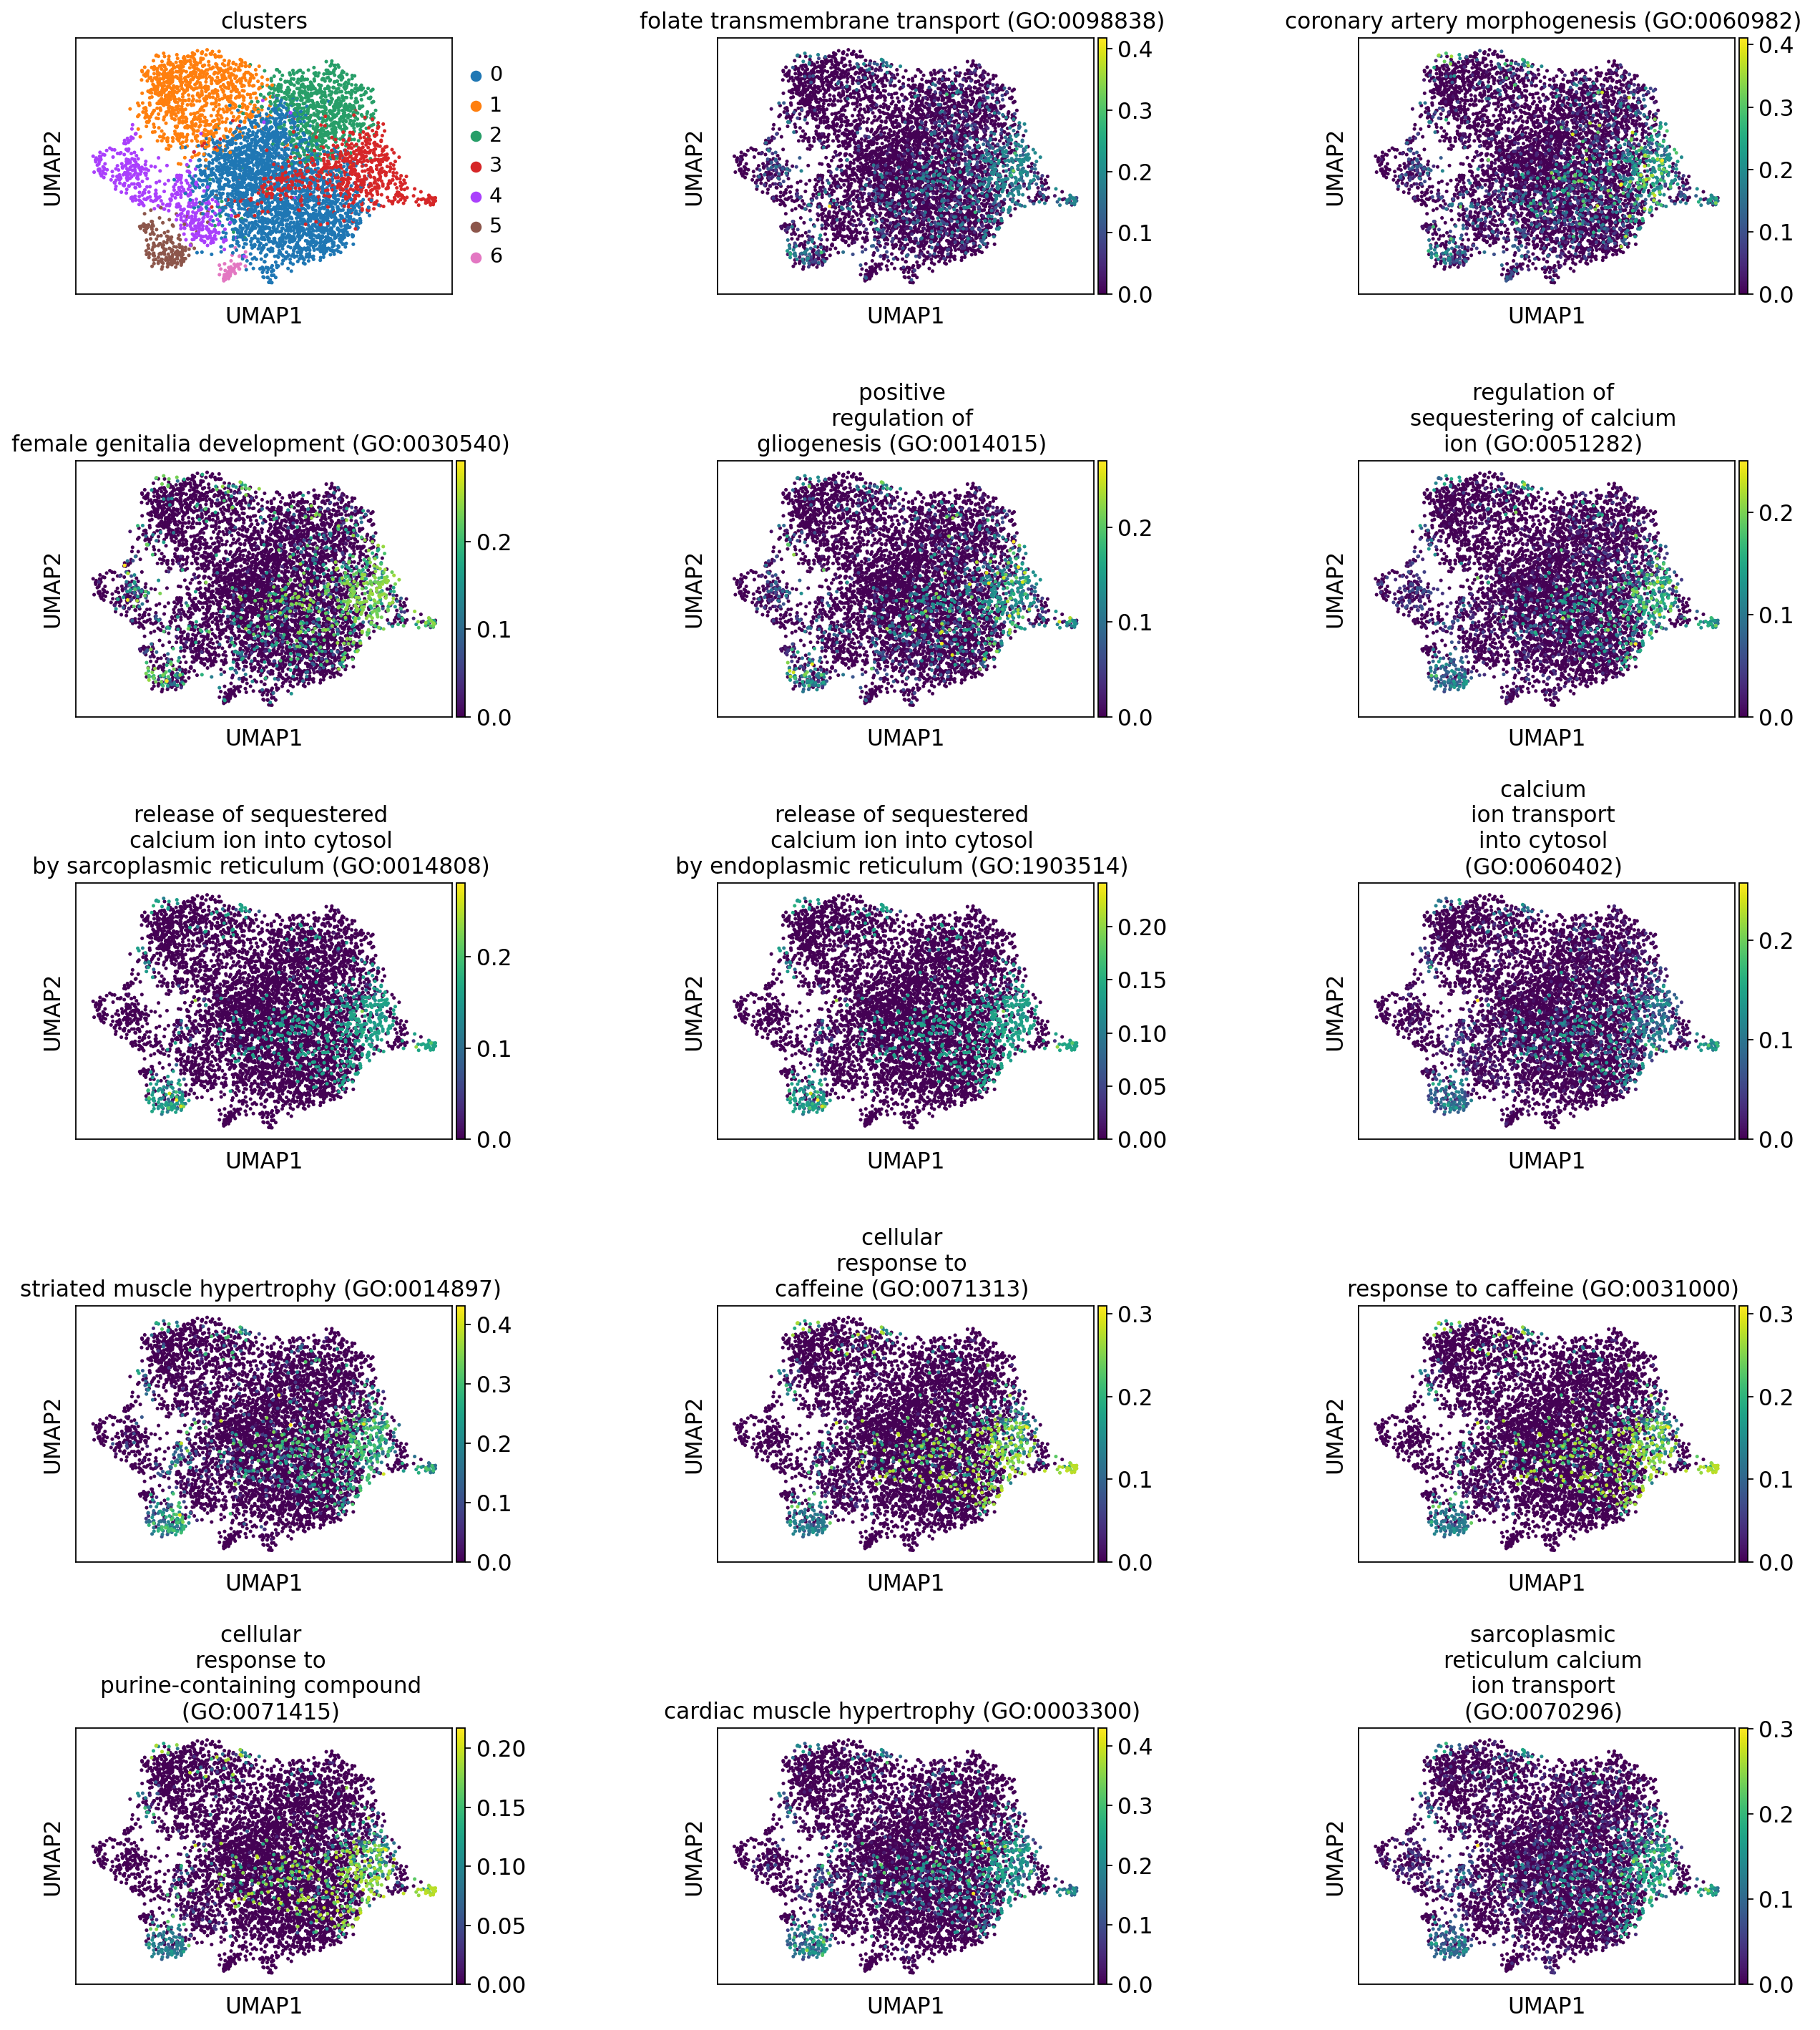

In [30]:
axes=sc.pl.embedding(adata_aucs,ncols=3,
                basis='umap',show=False,return_fig=True,wspace=0.55,hspace=0.65,
                color=['leiden_res0_5']+degs.values.tolist(),
                title=[ov.utils.plot_text_set(i,3,20)for i in ['clusters']+degs.values.tolist()])

axes.tight_layout()

In [62]:
# create a dictionary to map cluster to annotation label
cluster2annotation = {
    "0": "Quiescent",
    "1": "Proliferating",
    "2": "Low proliferating",
    "3": "Axon guidance",
    "4": "Primed quiescent",
    "5": "Vascular development"
}

# add a new `.obs` column called `cell type` by mapping clusters to annotation using pandas `map` function
adata.obs["cell_type"] = adata.obs["leiden_res0_5"].map(cluster2annotation).astype("category")

In [66]:
# Calculate and visualize specific signaling pathways for all clusters
res=ov.single.pathway_enrichment(adata,pathways_dict=pathway_dict,organism='Human',
                                     group_by='cell_type',plot=False)

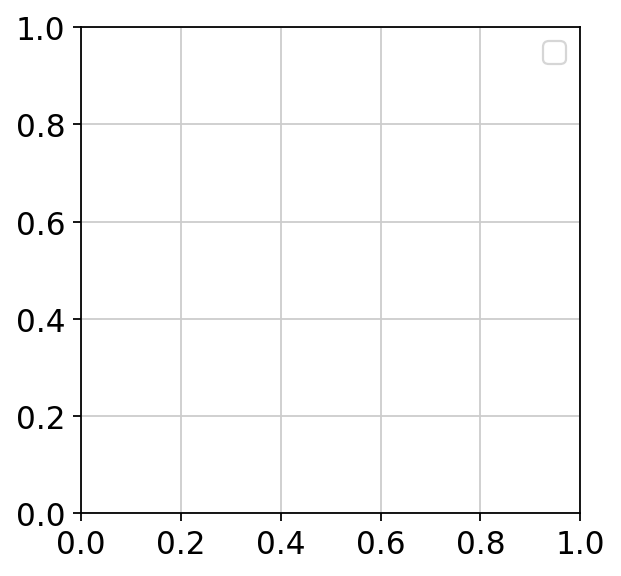

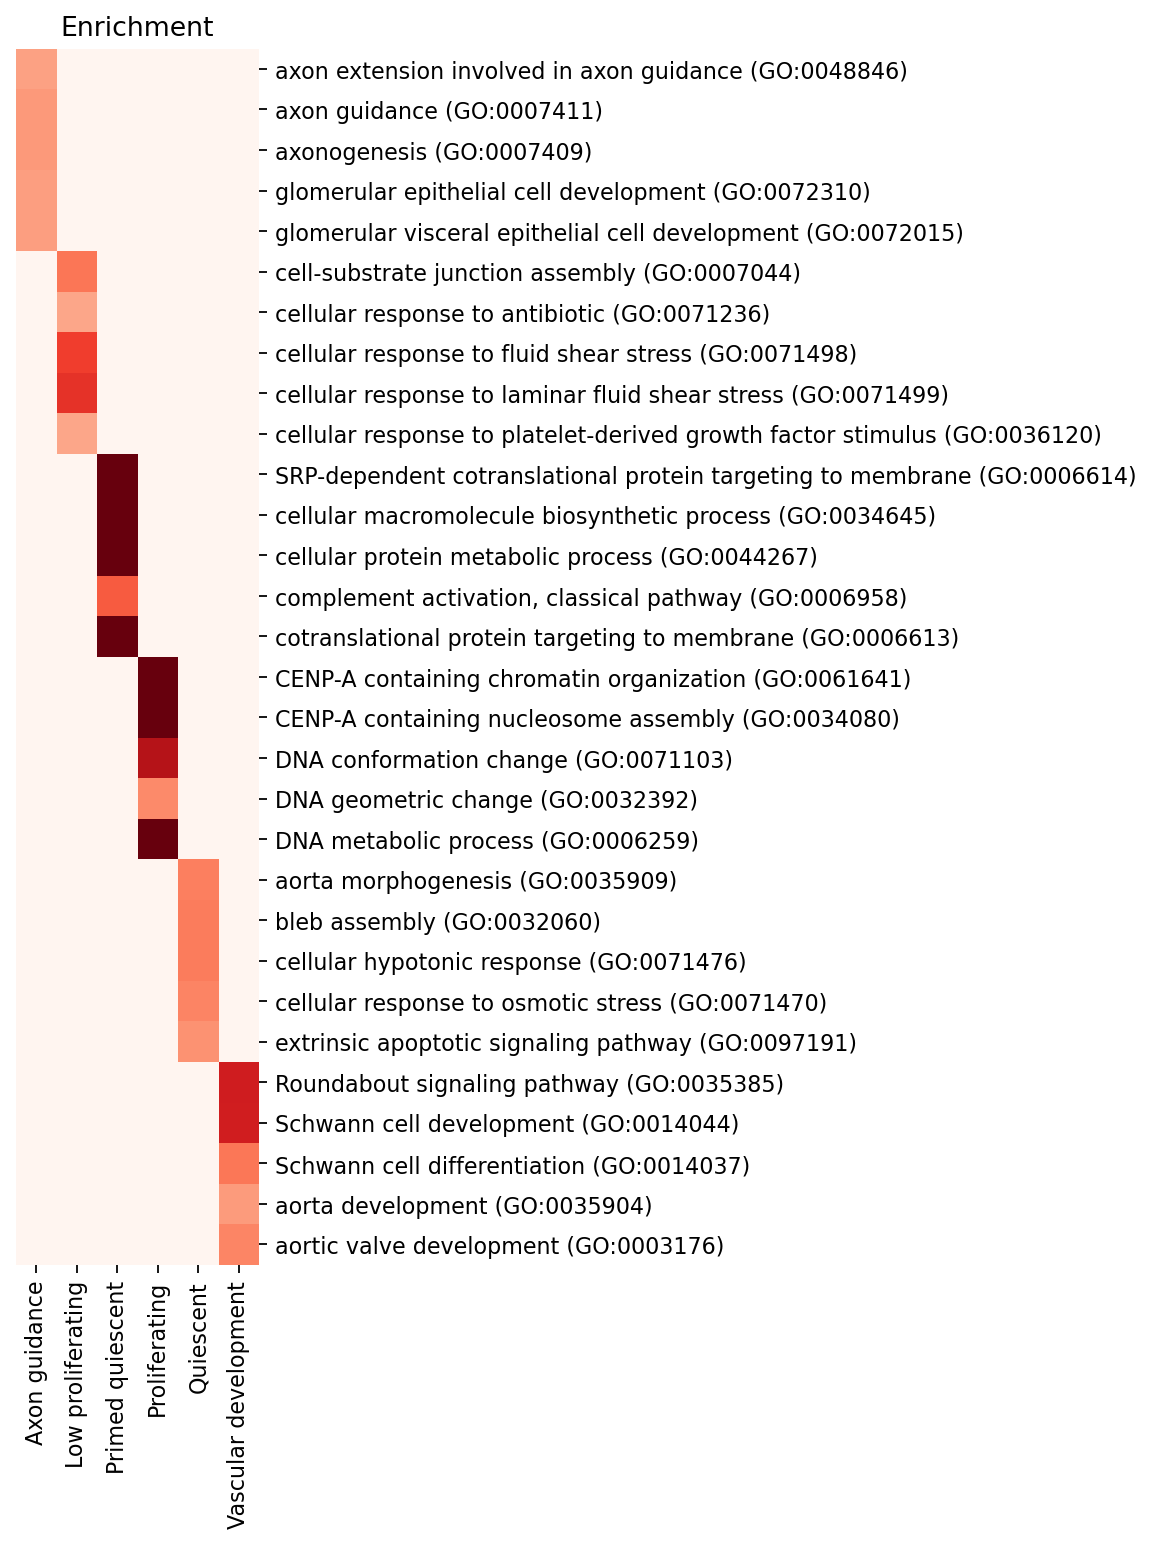

In [74]:
plt.legend()
ax=ov.single.pathway_enrichment_plot(res,plot_title='Enrichment',cmap='Reds',
                                         xticklabels=True,cbar=False,square=True,vmax=10,
                                         yticklabels=True,cbar_kws={'label': '-log10(qvalue)','shrink': 0.5,})